In [ ]:
import pandas as pd
import numpy as np
import requests
import collections
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cd /content/drive/MyDrive/Data Analyst/Spotify

/content/drive/MyDrive/Data Analyst/Spotify


In [ ]:
# Read the csv file
df = pd.read_csv('./indie_df.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,analysis_url,duration_ms,time_signature,name,song_artist_names,artist_name,song_popularity,released_date,duration_m,published_days
0,0.650,0.195,5,-13.678,1,0.0495,0.6450,0.000797,0.107,0.375,...,https://api.spotify.com/v1/audio-analysis/6SiV...,250485,4,Da Lau Roi - Cheung,['Cheung'],Cheung,34,2021-02-25,4.17,494
1,0.665,0.277,0,-12.457,0,0.0336,0.8690,0.000239,0.158,0.236,...,https://api.spotify.com/v1/audio-analysis/0AFG...,250539,3,Hoàng Hôn - Cheung,['Cheung'],Cheung,46,2019-05-10,4.18,1151
2,0.896,0.668,9,-9.557,1,0.1310,0.0135,0.000151,0.163,0.137,...,https://api.spotify.com/v1/audio-analysis/7juB...,119562,4,Cheung Beat - Cheung,"['Socr8s', 'Cheung']",Cheung,1,2022-05-01,1.99,64
3,0.717,0.470,0,-9.917,1,0.0350,0.4790,0.026200,0.106,0.675,...,https://api.spotify.com/v1/audio-analysis/4YNO...,199000,4,Leilah - Mademoiselle,['Mademoiselle'],Mademoiselle,20,2022-01-20,3.32,165
4,0.755,0.454,7,-10.255,1,0.0703,0.0783,0.596000,0.206,0.540,...,https://api.spotify.com/v1/audio-analysis/5YBU...,201000,4,When we - Mademoiselle,['Mademoiselle'],Mademoiselle,15,2022-01-20,3.35,165


# Create heatmap of every artists and songs by popularity

In [ ]:
# Ranking the song by popularity and artist name
sorted_df = df.sort_values(by=['artist_name', 'song_popularity'], ascending=False)
sorted_df['rank'] = sorted_df.groupby("artist_name")["song_popularity"].rank(ascending=False, method='first')
sorted_df['rank'] = sorted_df['rank'].astype(int)
sorted_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,duration_ms,time_signature,name,song_artist_names,artist_name,song_popularity,released_date,duration_m,published_days,rank
814,0.649,0.932,0,-3.462,1,0.0811,0.09100,0.0,0.697,0.702,...,156789,4,Là Tất Cả - Đá Số Tới,['Đá Số Tới'],Đá Số Tới,30,2020-12-02,2.61,579,1
809,0.663,0.833,0,-6.218,1,0.0433,0.00243,0.0,0.187,0.619,...,142146,4,Dà Thế Là Yêu - Đá Số Tới,['Đá Số Tới'],Đá Số Tới,27,2022-04-24,2.37,71,2
816,0.528,0.873,4,-5.017,1,0.0646,0.05190,0.0,0.154,0.600,...,168000,4,Em - Đá Số Tới,['Đá Số Tới'],Đá Số Tới,27,2020-04-10,2.80,815,3
811,0.491,0.928,2,-6.439,1,0.0964,0.00475,0.0,0.973,0.588,...,162000,4,Bây Bì Ơi - Đá Số Tới,['Đá Số Tới'],Đá Số Tới,25,2021-05-02,2.70,428,4
813,0.431,0.949,4,-5.009,1,0.0616,0.00664,0.0,0.454,0.708,...,159600,4,Cà Lem Kem Chuối - Đá Số Tới,['Đá Số Tới'],Đá Số Tới,25,2021-04-01,2.66,459,5


In [ ]:
# Create pivot table
pivot_df = pd.pivot_table(sorted_df, values='song_popularity', index='artist_name', columns=['rank'], aggfunc='mean')

In [ ]:
# Read file artists_df
artists_df = pd.read_csv('./artists_df.csv')
artists_df.head()

,name,popularity,followers
0,Cheung,28,24252
1,Mademoiselle,31,44290
2,Thịnh Suy,48,280375
3,TRANG,41,77103
4,Tùng,32,26810


In [ ]:
# Sort artists name by popularity
dict_popularity = dict(zip(artists_df['name'], artists_df['popularity']))
pivot_df['popularity'] = pivot_df.index.to_series().apply(lambda x: dict_popularity[x])
pivot_df = pivot_df.sort_values(by=['popularity'], ascending=False)
pivot_df

rank,1,2,3,4,5,6,7,8,9,10,...,146,147,148,149,150,151,152,153,154,popularity
artist_name,,,,,,,,,,,,,,,,,,,,,
Thịnh Suy,61.0,58.0,48.0,47.0,44.0,42.0,41.0,40.0,40.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
Madihu,63.0,42.0,41.0,40.0,34.0,34.0,32.0,31.0,28.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
Ngọt,49.0,48.0,45.0,42.0,40.0,40.0,38.0,38.0,37.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
14 Casper,59.0,42.0,41.0,35.0,27.0,24.0,18.0,16.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
TRANG,49.0,42.0,39.0,38.0,38.0,37.0,36.0,35.0,35.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Astronormous,22.0,11.0,7.0,4.0,3.0,3.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
Gác Mái,13.0,12.0,11.0,10.0,10.0,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
HUB,13.0,12.0,5.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


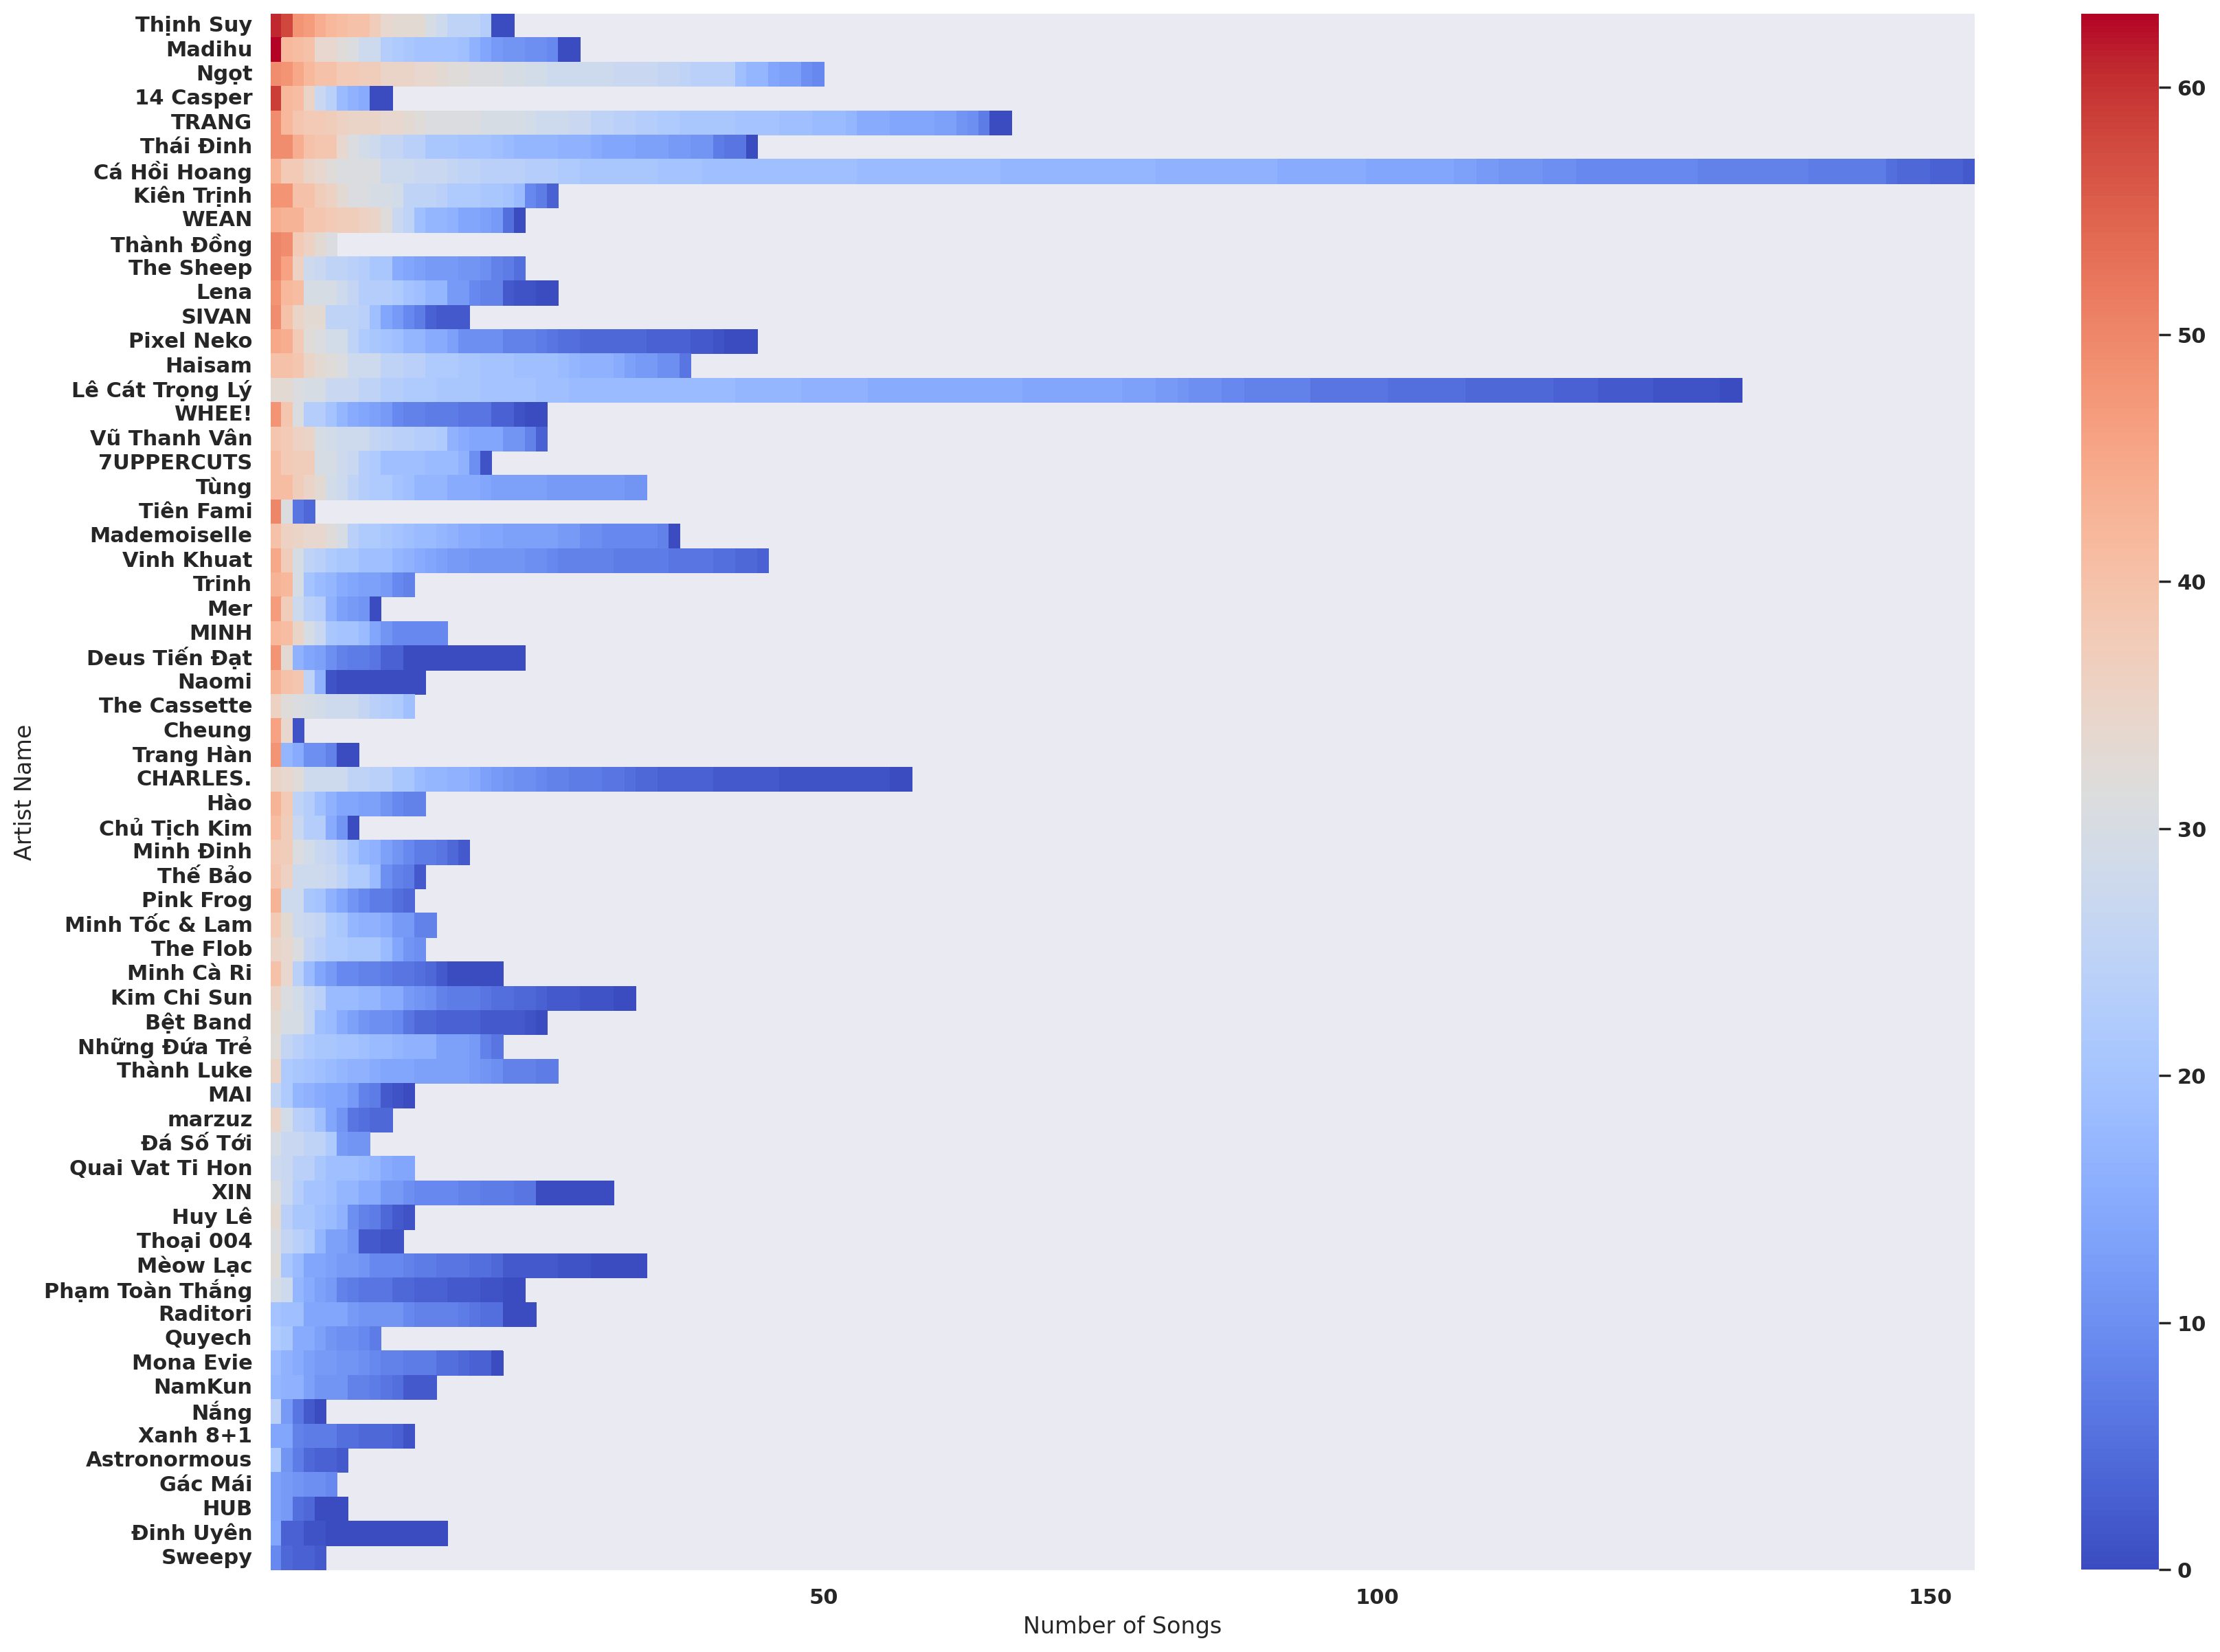

In [ ]:
# Create heatmap chart
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(pivot_df.iloc[:, :-1], cmap="coolwarm")
plt.xticks([50, 100, 150], [50, 100, 150], rotation=0)
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.rcParams["font.weight"] = "bold"